In [1]:
# Importar las bibliotecas necesarias
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Configurar estilo de gráficos
sns.set(style="whitegrid")

# Descargar datos de las acciones de Apple
ticker = "AAPL"
start_date = "2020-01-01"
end_date = "2024-12-31"

data = yf.download(ticker, start=start_date, end=end_date)

# Vista previa de los datos descargados
print(data.head())

[*********************100%***********************]  1 of 1 completed

Price           Close       High        Low       Open     Volume
Ticker           AAPL       AAPL       AAPL       AAPL       AAPL
Date                                                             
2020-01-02  72.796013  72.856606  71.545380  71.799866  135480400
2020-01-03  72.088295  72.851761  71.862892  72.020432  146322800
2020-01-06  72.662712  72.701492  70.954002  71.206070  118387200
2020-01-07  72.320969  72.929314  72.100410  72.672402  108872000
2020-01-08  73.484360  73.787323  72.022865  72.022865  132079200


In [3]:
data.columns

MultiIndex([( 'Close', 'AAPL'),
            (  'High', 'AAPL'),
            (   'Low', 'AAPL'),
            (  'Open', 'AAPL'),
            ('Volume', 'AAPL')],
           names=['Price', 'Ticker'])

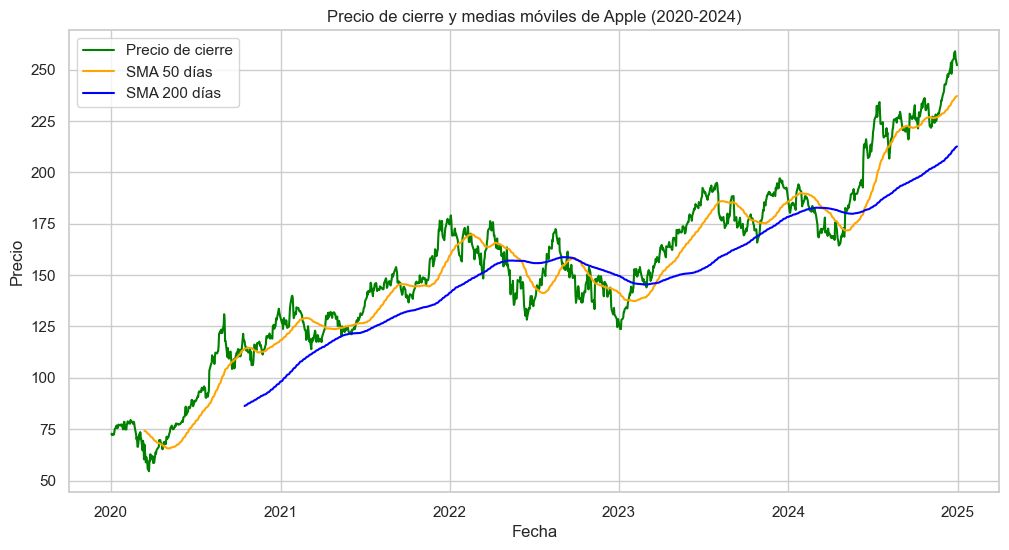

In [5]:
# Limpieza de datos: eliminar filas con valores faltantes
data = data.dropna()

# Añadir indicadores técnicos al conjunto de datos
data['SMA_50'] = data['Close'].rolling(window=50).mean()  # Media móvil simple de 50 días
data['SMA_200'] = data['Close'].rolling(window=200).mean()  # Media móvil simple de 200 días
data['RSI'] = 100 - (100 / (1 + (data['Close'].diff().clip(lower=0).rolling(window=14).mean() /
                                 abs(data['Close'].diff()).rolling(window=14).mean())))

# Visualización de precios históricos y medias móviles
plt.figure(figsize=(12, 6))
plt.plot(data['Close'], label="Precio de cierre", color="green")
plt.plot(data['SMA_50'], label="SMA 50 días", color="orange")
plt.plot(data['SMA_200'], label="SMA 200 días", color="blue")
plt.title("Precio de cierre y medias móviles de Apple (2020-2024)")
plt.xlabel("Fecha")
plt.ylabel("Precio")
plt.legend()
plt.show()

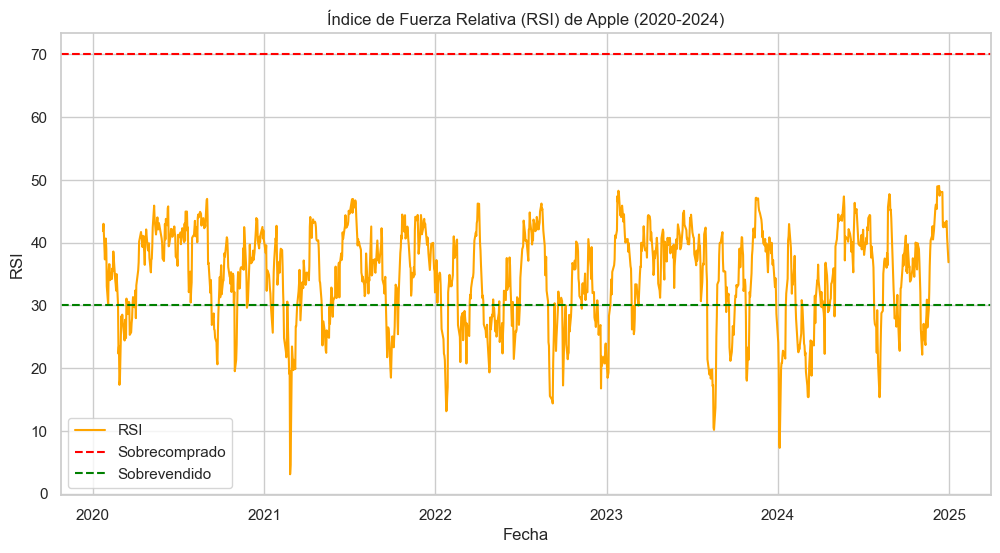

In [7]:
# Visualización del RSI
plt.figure(figsize=(12, 6))
plt.plot(data['RSI'], label="RSI", color="orange")
plt.axhline(70, linestyle="--", color="red", label="Sobrecomprado")
plt.axhline(30, linestyle="--", color="green", label="Sobrevendido")
plt.title("Índice de Fuerza Relativa (RSI) de Apple (2020-2024)")
plt.xlabel("Fecha")
plt.ylabel("RSI")
plt.legend()
plt.show()

In [9]:
# Preparación de datos para Machine Learning
data['Target'] = data['Close'].shift(-1)  # El objetivo es predecir el precio del día siguiente
features = ['Open', 'High', 'Low', 'Close', 'Volume', 'SMA_50', 'SMA_200', 'RSI']
data = data.dropna()

X = data[features]
y = data['Target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Modelo de Machine Learning: Random Forest Regressor
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predicciones y evaluación
y_pred = model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"Error cuadrático medio (RMSE): {rmse}")

Error cuadrático medio (RMSE): 2.8694864411801664


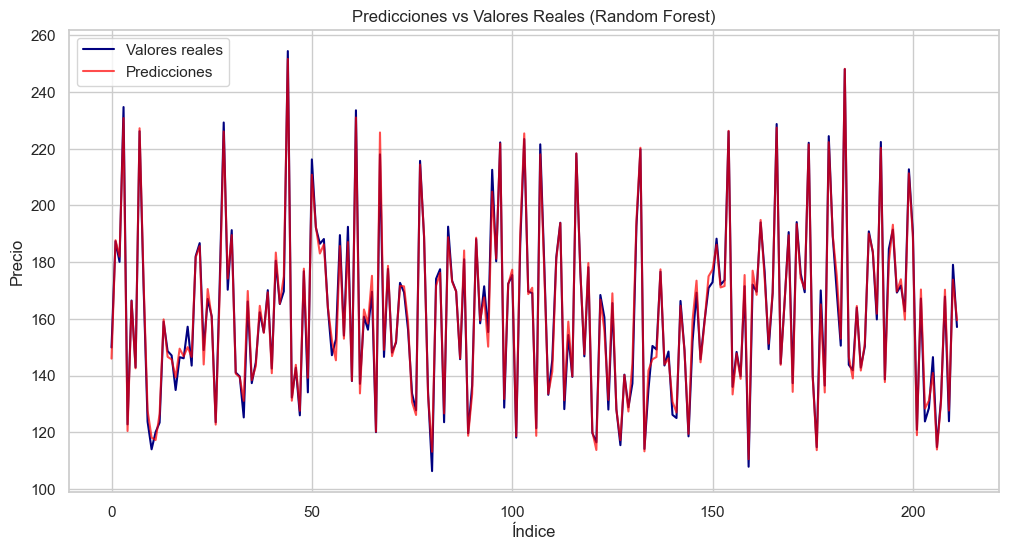

In [11]:
# Visualización de predicciones frente a valores reales
plt.figure(figsize=(12, 6))
plt.plot(y_test.values, label="Valores reales", color="navy")
plt.plot(y_pred, label="Predicciones", color="red", alpha=0.7)
plt.title("Predicciones vs Valores Reales (Random Forest)")
plt.xlabel("Índice")
plt.ylabel("Precio")
plt.legend()
plt.show()

In [13]:
# Importar bibliotecas adicionales para análisis avanzado
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense, Dropout

# --- Análisis Exploratorio Avanzado ---
# Estadísticas descriptivas
print("Estadísticas descriptivas:")
print(data.describe())

Estadísticas descriptivas:
Price         Close         High          Low         Open        Volume  \
Ticker         AAPL         AAPL         AAPL         AAPL          AAPL   
count   1057.000000  1057.000000  1057.000000  1057.000000  1.057000e+03   
mean     164.627219   166.215241   162.858949   164.460814  7.557262e+07   
std       32.385247    32.426452    32.214886    32.287727  3.121140e+07   
min      106.178108   108.042598   104.762663   106.510010  2.323470e+07   
25%      141.046783   142.403544   139.203263   140.858738  5.284520e+07   
50%      162.303253   163.809736   159.835425   161.414666  6.966050e+07   
75%      182.575775   184.183545   180.696183   182.357416  9.048110e+07   
max      259.019989   260.100006   257.630005   258.190002  3.186799e+08   

Price        SMA_50      SMA_200          RSI       Target  
Ticker                                                      
count   1057.000000  1057.000000  1057.000000  1057.000000  
mean     161.653364   152.351

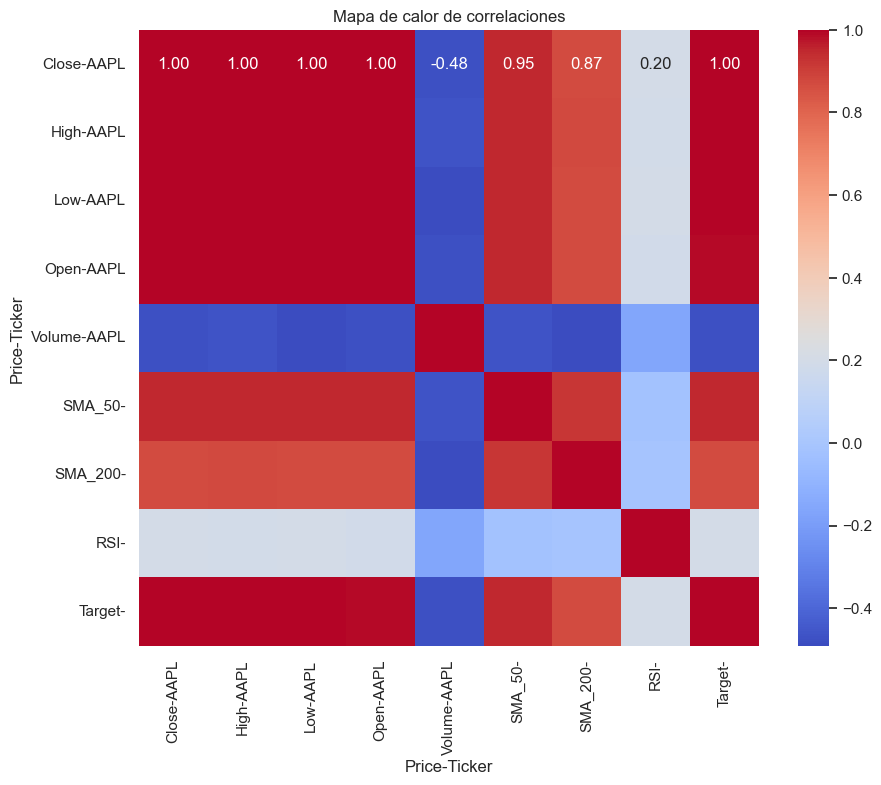

In [15]:
# Análisis de correlación entre variables
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Mapa de calor de correlaciones")
plt.show()

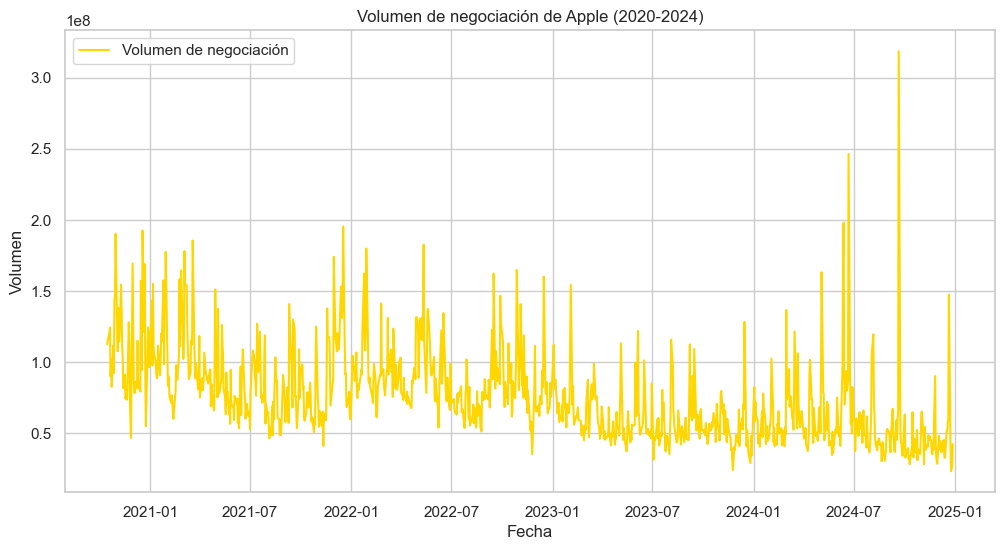

In [17]:
# Gráfico de volumen de negociación
plt.figure(figsize=(12, 6))
plt.plot(data['Volume'], label="Volumen de negociación", color="gold")
plt.title("Volumen de negociación de Apple (2020-2024)")
plt.xlabel("Fecha")
plt.ylabel("Volumen")
plt.legend()
plt.show()

In [19]:
# --- Indicadores Técnicos Adicionales ---
# Bandas de Bollinger
data['BB_upper'] = data['Close'].rolling(window=20).mean() + (data['Close'].rolling(window=20).std() * 2)
data['BB_lower'] = data['Close'].rolling(window=20).mean() - (data['Close'].rolling(window=20).std() * 2)

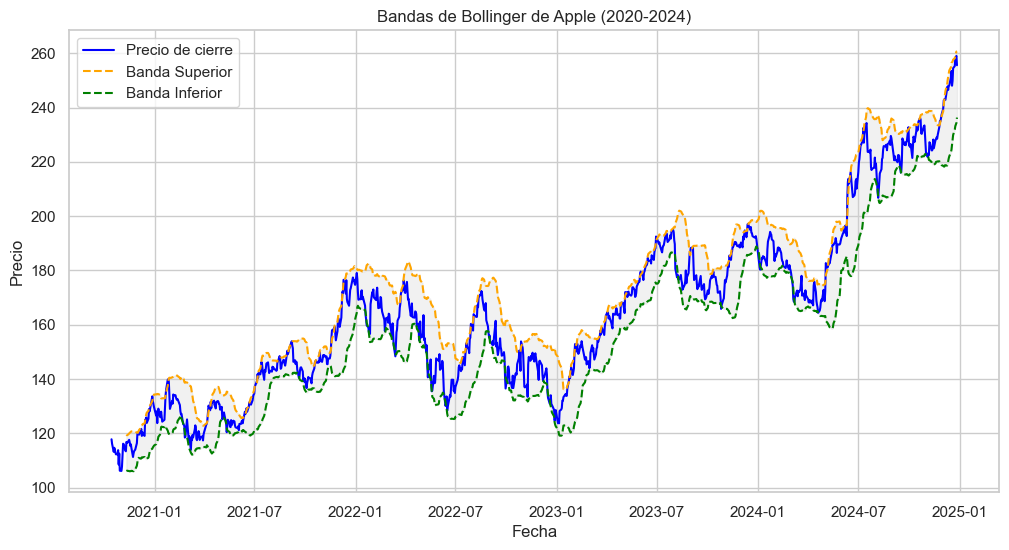

In [21]:
# Visualización de las Bandas de Bollinger
plt.figure(figsize=(12, 6))
plt.plot(data['Close'], label="Precio de cierre", color="blue")
plt.plot(data['BB_upper'], label="Banda Superior", linestyle="--", color="orange")
plt.plot(data['BB_lower'], label="Banda Inferior", linestyle="--", color="green")
plt.fill_between(data.index, data['BB_lower'], data['BB_upper'], color='lightgray', alpha=0.3)
plt.title("Bandas de Bollinger de Apple (2020-2024)")
plt.xlabel("Fecha")
plt.ylabel("Precio")
plt.legend()
plt.show()

In [23]:
# --- Modelo Alternativo: Redes Neuronales ---
# Normalización de datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train_scaled, X_test_scaled, y_train_scaled, y_test_scaled = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [25]:
# Construcción del modelo de red neuronal
model_nn = Sequential()
model_nn.add(Dense(128, input_dim=X_train_scaled.shape[1], activation='relu'))
model_nn.add(Dropout(0.3))
model_nn.add(Dense(64, activation='relu'))
model_nn.add(Dropout(0.2))
model_nn.add(Dense(1, activation='linear'))

model_nn.compile(optimizer='adam', loss='mse', metrics=['mae'])
print(model_nn.summary())

C:\Users\Axel\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 128)                 │           1,152 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 9,473 (37.00 KB)

 Trainable params: 9,473 (37.00 KB)

 Non-trainable params: 0 (0.00 B)

None


In [27]:
# Entrenamiento del modelo
history = model_nn.fit(X_train_scaled, y_train_scaled, epochs=50, batch_size=32, validation_split=0.2, verbose=1)

Epoch 1/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 6s 51ms/step - loss: 28903.7129 - mae: 166.6139 - val_loss: 27192.5586 - val_mae: 161.6860
Epoch 2/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 27268.7090 - mae: 162.0351 - val_loss: 25176.3145 - val_mae: 155.4719
Epoch 3/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 24154.9531 - mae: 152.3853 - val_loss: 20970.0586 - val_mae: 141.4366
Epoch 4/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 19744.3457 - mae: 137.3056 - val_loss: 14504.4258 - val_mae: 115.3241
Epoch 5/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 13051.7119 - mae: 107.9445 - val_loss: 8430.1787 - val_mae: 82.4064
Epoch 6/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 7448.7964 - mae: 76.2964 - val_loss: 6075.7749 - val_mae: 70.4401
Epoch 7/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 6105.5137 - mae: 69.1492 - val_loss: 5607.2856 - val_mae: 67.2478
Epoch 8/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 5564.3389 - mae: 66.3008 - val_loss: 5041.5054 -

In [29]:
# Evaluación del modelo
loss, mae = model_nn.evaluate(X_test_scaled, y_test_scaled)
print(f"Error Absoluto Medio (MAE): {mae}")

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 137.7005 - mae: 5.7600
Error Absoluto Medio (MAE): 5.337128162384033


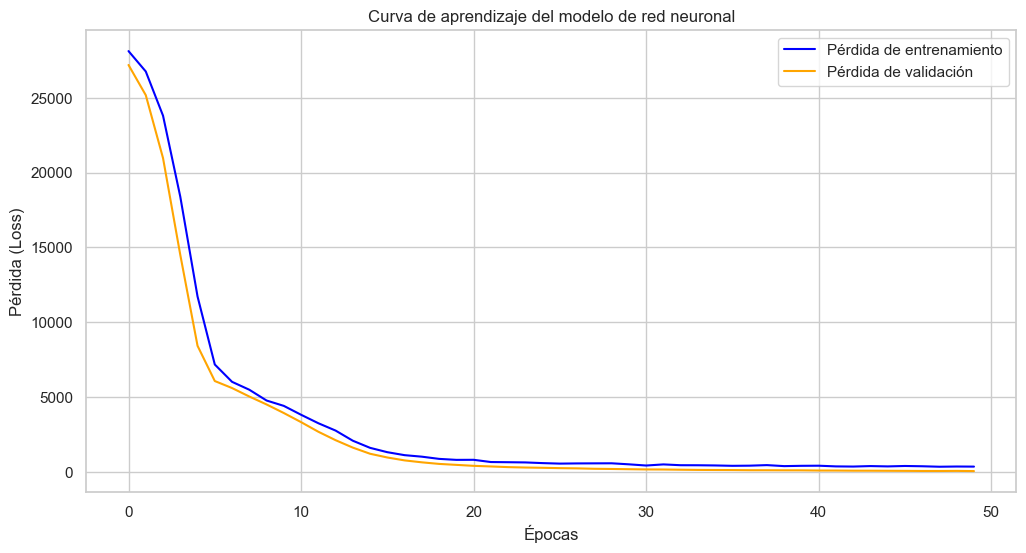

In [31]:
# Gráfico de aprendizaje
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Pérdida de entrenamiento', color='blue')
plt.plot(history.history['val_loss'], label='Pérdida de validación', color='orange')
plt.title("Curva de aprendizaje del modelo de red neuronal")
plt.xlabel("Épocas")
plt.ylabel("Pérdida (Loss)")
plt.legend()
plt.show()

In [35]:
# Predicciones con el modelo neuronal
y_pred_nn = model_nn.predict(X_test_scaled)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


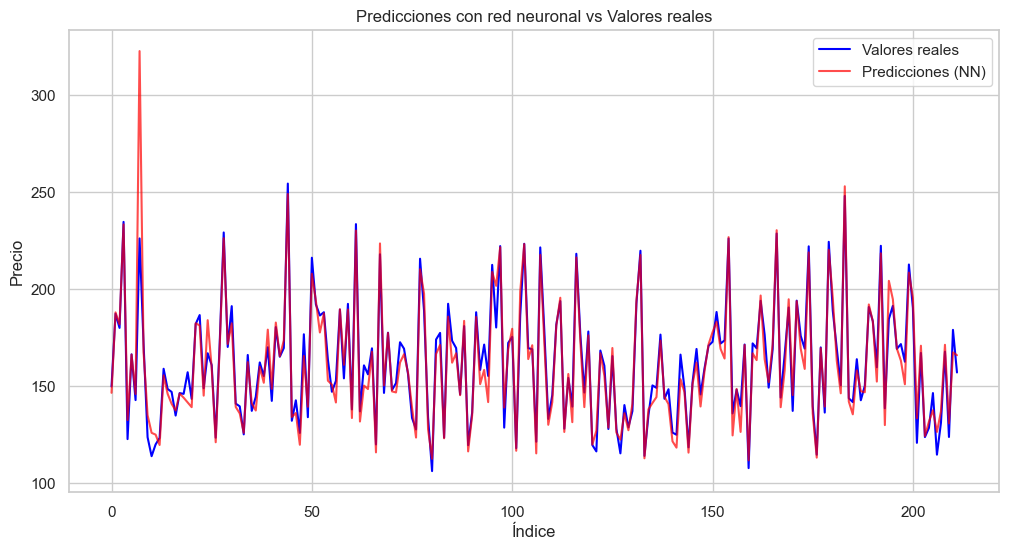

In [37]:
# Comparación de predicciones con valores reales
plt.figure(figsize=(12, 6))
plt.plot(y_test_scaled.values, label="Valores reales", color="blue")
plt.plot(y_pred_nn, label="Predicciones (NN)", color="red", alpha=0.7)
plt.title("Predicciones con red neuronal vs Valores reales")
plt.xlabel("Índice")
plt.ylabel("Precio")
plt.legend()
plt.show()


In [39]:
# --- Análisis de Resultados ---
# Comparar los modelos de Random Forest y la red neuronal
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred))
rmse_nn = np.sqrt(mean_squared_error(y_test_scaled, y_pred_nn))

print(f"Error Cuadrático Medio (Random Forest): {rmse_rf}")
print(f"Error Cuadrático Medio (Red Neuronal): {rmse_nn}")

if rmse_rf < rmse_nn:
    print("El modelo de Random Forest tiene un mejor rendimiento.")
else:
    print("El modelo de Red Neuronal tiene un mejor rendimiento.")

Error Cuadrático Medio (Random Forest): 2.8694864411801664
Error Cuadrático Medio (Red Neuronal): 9.099267090652821
El modelo de Random Forest tiene un mejor rendimiento.


In [41]:
from statsmodels.tsa.arima.model import ARIMA
import pandas_datareader.data as web

# --- Predicciones a Largo Plazo con ARIMA ---
# Configuración de datos de cierre para ARIMA
data_arima = data['Close']

data.index = pd.to_datetime(data.index)  
data = data.asfreq('D')  

# Ajustar el modelo ARIMA
model_arima = ARIMA(data_arima, order=(5, 1, 0))  # (p, d, q): parámetros elegidos por prueba y error
model_fit = model_arima.fit()

C:\Users\Axel\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Axel\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Axel\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [42]:
# Predicción a largo plazo (6 meses: ~126 días hábiles)
forecast_steps = 126
forecast = model_fit.get_forecast(steps=forecast_steps)
forecast_index = pd.date_range(data_arima.index[-1], periods=forecast_steps + 1, freq='B')[1:]
forecast_values = forecast.predicted_mean
forecast_ci = forecast.conf_int()

C:\Users\Axel\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\Axel\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


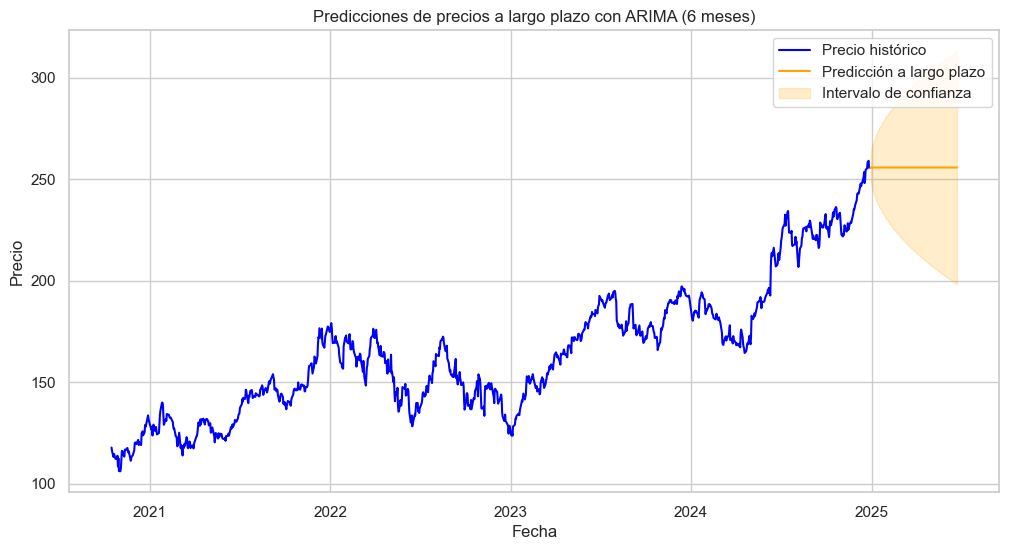

In [45]:
# Visualización de predicciones a largo plazo
plt.figure(figsize=(12, 6))
plt.plot(data_arima, label="Precio histórico", color="blue")
plt.plot(forecast_index, forecast_values, label="Predicción a largo plazo", color="orange")
plt.fill_between(forecast_index, forecast_ci.iloc[:, 0], forecast_ci.iloc[:, 1], color='orange', alpha=0.2, label="Intervalo de confianza")
plt.title("Predicciones de precios a largo plazo con ARIMA (6 meses)")
plt.xlabel("Fecha")
plt.ylabel("Precio")
plt.legend()
plt.show()

In [47]:
# --- Análisis Económico ---
# Descarga de indicadores macroeconómicos desde FRED
start_macro = "2020-01-01"
end_macro = "2024-12-31"

# PIB (Gross Domestic Product)
gdp = web.DataReader("GDP", "fred", start_macro, end_macro)

# Índice de Precios al Consumidor (Inflación)
cpi = web.DataReader("CPIAUCSL", "fred", start_macro, end_macro)

# Tasa de interés de la Fed (Federal Funds Rate)
interest_rate = web.DataReader("FEDFUNDS", "fred", start_macro, end_macro)

In [49]:
# Combinar los datos macroeconómicos
macro_data = pd.concat([gdp, cpi, interest_rate], axis=1)
macro_data.columns = ["GDP", "CPI", "Interest_Rate"]

# Reescalar los datos para comparar
macro_data_scaled = macro_data.apply(lambda x: (x - x.min()) / (x.max() - x.min()))
macro_data_scaled['Apple_Close'] = (data['Close'] - data['Close'].min()) / (data['Close'].max() - data['Close'].min())

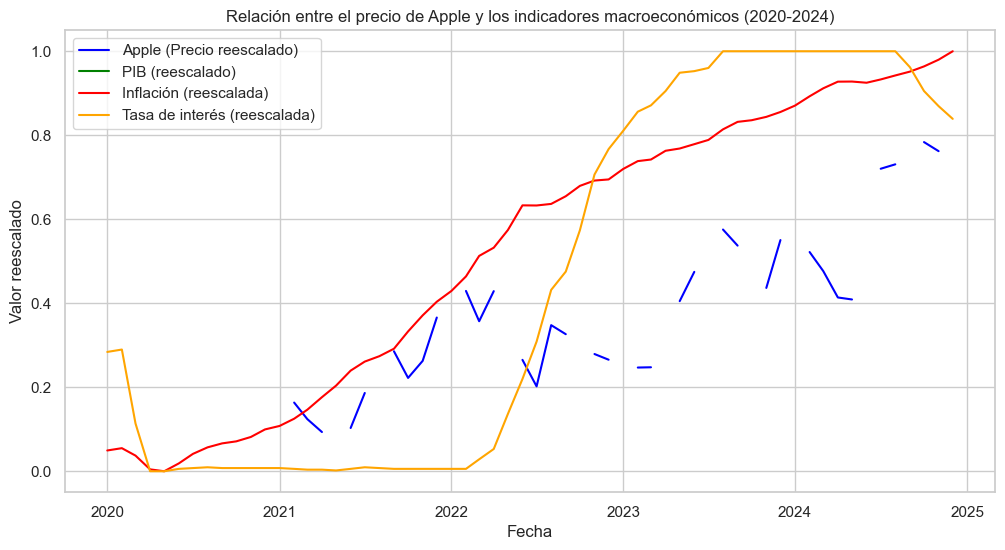

In [51]:
# Visualización de indicadores económicos
plt.figure(figsize=(12, 6))
plt.plot(macro_data_scaled['Apple_Close'], label="Apple (Precio reescalado)", color="blue")
plt.plot(macro_data_scaled['GDP'], label="PIB (reescalado)", color="green")
plt.plot(macro_data_scaled['CPI'], label="Inflación (reescalada)", color="red")
plt.plot(macro_data_scaled['Interest_Rate'], label="Tasa de interés (reescalada)", color="orange")
plt.title("Relación entre el precio de Apple y los indicadores macroeconómicos (2020-2024)")
plt.xlabel("Fecha")
plt.ylabel("Valor reescalado")
plt.legend()
plt.show()

In [53]:
# Análisis de correlación entre Apple y factores macroeconómicos
macro_data['Apple_Close'] = data['Close']
correlation = macro_data.corr()
print("Correlación entre el precio de Apple y los indicadores macroeconómicos:")
print(correlation['Apple_Close'])

Correlación entre el precio de Apple y los indicadores macroeconómicos:
GDP              0.889375
CPI              0.805274
Interest_Rate    0.682654
Apple_Close      1.000000
Name: Apple_Close, dtype: float64


In [57]:
# --- Análisis de Resultados ---
# Resumen de impacto económico
if correlation['Apple_Close']['GDP'] > 0.5:
    print("El precio de Apple tiene una fuerte relación positiva con el PIB.")
else:
    print("El precio de Apple tiene una relación débil con el PIB.")

if correlation['Apple_Close']['CPI'] < -0.5:
    print("El precio de Apple tiene una fuerte relación negativa con la inflación.")
else:
    print("El precio de Apple tiene una relación débil con la inflación.")

if correlation['Apple_Close']['Interest_Rate'] < -0.5:
    print("El precio de Apple tiende a bajar cuando aumentan las tasas de interés.")
else:
    print("El precio de Apple no está significativamente afectado por las tasas de interés.")

El precio de Apple tiene una fuerte relación positiva con el PIB.
El precio de Apple tiene una relación débil con la inflación.
El precio de Apple no está significativamente afectado por las tasas de interés.


## pendientes para indice de fuerza relativa 

In [11]:
from sklearn.model_selection import KFold

In [13]:
X = data[['Close', 'High', 'Low', 'Open', 'Volume', 'SMA_50', 'SMA_200', 'RSI']]
y = data['Target']

kf = KFold(n_splits=5, shuffle=True, random_state=42)
model = RandomForestRegressor()

mse_scores = []

for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    mse = mean_squared_error(y_test, predictions)
    mse_scores.append(mse)

print(f'Mean MSE: {sum(mse_scores) / len(mse_scores)}')

Mean MSE: 8.23183560206276


In [15]:
from sklearn.model_selection import GridSearchCV

In [17]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
}

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X, y)

print(f'Best parameters: {grid_search.best_params_}')
print(f'Best score: {-grid_search.best_score_}')

Best parameters: {'max_depth': 30, 'n_estimators': 100}
Best score: 175.9492706304801


## preparacion de machine learning

- validacion cruzada
- ajuste de hiperparametros


## Errores de prediccion (prediccion vs valores reales)
- MSE
- MAE